# PROJET DE MACHINE LEARNING : AMADEUS

L'objectif de ce projet est de mettre en place un modèle de Machine Learning permettant de prédire un Burn_out

### A- IMPORTATION DES PACKAGES ET MODULES 

In [2]:
# Packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
from sklearn.ensemble import IsolationForest
import warnings
warnings.filterwarnings('ignore')

### B- IMPORTATION DES DONNEES 

In [3]:
dataset = pd.read_csv("AMADEUS.csv")
dataset.head()

,Séquentiel,SID,Heure de complétion,1statutactuel,Profession category,MEDIDEASCADRE,STATUTPRO4CAT,MEDIDEvsASCADRE,MEDECIN_ALL,INTERNE,...,PSQI_QUALITE_CONTINU,PSQI_MAUVAISE_QUALITE_BIN,"125. Au cours des 30 derniers jours, combien de fois avez-vous pris des médicaments pour mieux dormir (médicaments prescrits par votre médecin ou vendus sans ordonnance) ?",HYPNOTIQUES,"126. Au cours des 30 derniers jours, combien de fois avez-vous eu des difficultés à rester éveillé(e) en conduisant, en mangeant, ou en participant à des activités avec d’autres personnes ?","127. Au cours des 30 derniers jours, combien vous a-t-il été difficile d’être suffisamment motivé(e) pour mener à bien vos activités ?",SOMNOLENCE_MOD_SEVERE,MOTIVATION_DEFICIT_MOD_SEVERE+II4,128DIFF_FINANCE,129REMUNERATION_JUSTE_VALEUR
0,26,8424666,4/26/21 16:39,Médecin : PH titulaire,Physician,1,Physician,1.0,1,0,...,2,1,0,0,0,0,0,0,NaN,NaN
1,27,8437258,4/27/21 15:00,Infirmier Diplômé d'Etat,Nurse,1,Nurse,1.0,0,0,...,2,1,2,1,1,1,0,0,NaN,NaN
2,28,8437467,4/27/21 15:11,Médecin : PH titulaire,Physician,1,Physician,1.0,1,0,...,2,1,3,1,0,2,0,1,NaN,NaN
3,29,8437725,4/27/21 15:23,Médecin : Interne en médecine (incluant intern...,Physician,1,Physician,1.0,1,1,...,2,1,1,1,1,1,0,0,NaN,NaN
4,30,8438934,4/27/21 16:24,Infirmier Diplômé d'Etat,Nurse,1,Nurse,1.0,0,0,...,2,1,1,1,1,2,0,1,NaN,NaN


###  C- DATA ENGINIEERING

In [4]:
# Affichage des colonnes ou des variables de mon dataset

print(dataset.columns.tolist())

['Séquentiel', 'SID', 'Heure de complétion', '1statutactuel', 'Profession category', 'MEDIDEASCADRE', 'STATUTPRO4CAT', 'MEDIDEvsASCADRE', 'MEDECIN_ALL', 'INTERNE', 'IDE', 'AS', 'CADRE_IDE', 'CADRE_SUP', 'CADRE_IDEETSUP', 'CADRE_CADRESUP_ALL', 'PHARMACIEN', 'PSYCHO', 'SAGEFEMME', 'KINE', 'ERGO', 'DIRECTEURSOINS', 'MED_CDD_VS_CDI_PUBLIC', 'MED_PUBLIC_VS_PRIVE', 'IADE_IBODE_VS_AUTREIDE', '2. Quel âge avez-vous ?', '3. Votre sexe biologique :', 'SEX_M', '4. Votre genre psychique:', 'NON_BINAIRE', 'GENRE_M', 'taille', 'poids', 'IMC', 'SURPOIDS_OBESITE', 'OBESITE', 'codepostal', 'secteur_categories', 'PUBLICETEPBNL_VS_PRIVE', 'PUBLIC_VS_PRIVE_ET_EPBNL', '9. Exercez-vous dans un établissement', 'SANITAIRE_VS_MEDICOSOCIAL', 'ANCIENNETE', 'ANCIENNETE_1AN_OU_MOINS', '11conjoint_domicile', '12enfants_nb', 'ENFANT_BIN', '13reconfort_entourage', '14proche_aidant', 'service_COVID19', 'Anatomopathologie', 'Anesthésie', 'Biologie médicale', 'Chirurgie tête et cou', 'Chirurgie générale', 'Chirurgie inf

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10325 entries, 0 to 10324
Columns: 237 entries, Séquentiel to 129REMUNERATION_JUSTE_VALEUR
dtypes: float64(16), int64(206), object(15)
memory usage: 18.7+ MB


In [6]:
dataset.isnull().sum()

Séquentiel                                                                                                                                   0
SID                                                                                                                                          0
Heure de complétion                                                                                                                          0
1statutactuel                                                                                                                                0
Profession category                                                                                                                          0
                                                                                                                                          ... 
127. Au cours des 30 derniers jours, combien vous a-t-il été difficile d’être suffisamment motivé(e) pour mener à bien vos activités ?       0

In [7]:
dataset.shape

(10325, 237)

##### Commentaire : 
Mon dataset compte 10325 individus et 237 variables.
Mais nous n'utiliserons pas toutes les 237 variables donc nous allons subseter les variables qui nous intèrèsse

#### 1- CHOIX DE MES VARIABLES 

In [8]:
df = dataset[['2. Quel âge avez-vous ?','SEX_M','IMC','PUBLIC_VS_PRIVE_ET_EPBNL','ANCIENNETE','11conjoint_domicile','ENFANT_BIN',
'13reconfort_entourage','14proche_aidant','service_COVID19','Anatomopathologie','Anesthésie','Biologie médicale',
'Chirurgie tête et cou','Chirurgie générale', 'Chirurgie infantile/pédiatrique', 'Chirurgie Gynéco-Obstétrique', 
'Chirurgie Maxillo-faciale','Chirurgie: Neurochirurgie','Chirurgie: Ophtalmologie', 'Chirurgie : Orthopédie', 'Chirurgie plastique', 
'Chirurgie thoracique et cardiologique','Chirurgie Viscérale et Digestive','Chirurgie Urologique', 'Chirurgie Vasculaire',
'Direction des Soins', 'Enseignement/Formation', 'Enseignement/Recherche', 'Médecine : Allergologie', 'Médecine : Cardiologie', 
'Médecine : Dermatologie', 'Médecine : Endocrinologie', 'Médecine : Hématologie', 'Médecine : Gastroentérologie', 'Médecine Générale', 
'Médecine : Génétique', 'Médecine : Gériatrie', 'Médecine : Gynécologie médicale','Médecine : Infectiologie', 'Médecine Interne',
'Médecine: Néphrologie', 'Médecine : Neurologie','Médecine Nucléaire', 'Médecine : Ophtalmologie', 'Médecine : Oncologie', 
'Médecine : Oto-Rhino-Laryngologie ( ORL)', 'Médecine : Pédiatrie (Néonatologie)', 'Médecine : Pédiatrie (hors néonatologie)', 
'Médecine Physique et de Réadaptation', 'Médecine : Pneumologie', 'Médecine: Radiologie', 'Médecine : Rhumatologie', 'Médecine : Soins palliatifs',
'Médecine : Stomatologie', 'Médecine du travail', 'Médecine: Urgences', 'Médecine: Urgences préhospitalières (SAMU)', 'Médecine Vasculaire / angiologie', 
'Psychiatrie adulte','Psychiatrie: pédopsychiatrie et enfance inadaptée', 'Soins critiques : Réanimation', 'Soins critiques : soins continus ou soins intensifs polyvalents', 'Soins critiques : soins intensifs', 
'Santé Publique', "Service d'Information Médicale", 'Service qualité et gestion des risques', '16TEMPS_COMPLET', '17POSTE_DE_NUIT', 
'18GARDES_NUIT', '19HORAIRES_CONSTANTS', '21PLANNING_2SEM_CONNU', '22DEPASSEMENT_HORAIRE_PREVU_FQC', '23WKEND_W_MOIS_NB', '24ARRET_NB_J_LASTYEAR', 
'25MALADIE_CHRONIQUE', '26ALD','KARASEK_QUANTITE_RAPIDITE', 'KARASEK_COMPLEXITE_INTENSITE','KARASEK_MORCELLEMENT_IMPREVISIBILITE',
'KARASEK_LATITUDE_MARGEMANOEUVRE', 'KARASEK_UTILISATION_COMPETENCE', 'KARASEK_DVLPT_COMPETENCE', 
'KARASEK_SOUTIEN_PRO_SUPERIEURS', 'KARASEK_SOUTIEN_PRO_COLLEGUES', 'KARASEK_SOUTIEN_EMO_SUPERIEURS', 'KARASEK_SOUTIEN_EM0_COLLEGUES', 
 '75CRAINTE_ERREUR_FQC', '76HARCELEMENT_MORAL','78HARCELEMENT_SEXUEL','80SOBD','81EDM_LIFETIME_NB','82ATD', '83ANXIO', '84PSYCHOSTIM',
 '85SUIVI_PSY4', '86SUIVI_PSYCHO', '87NB_CIG', '88CAFE_TASSES','DETA_CUTOFF2','METS_MIN_SEMAINE','CESD1', 'CESD2', 'CESD3', 'CESD5', 'CESD6', 'CESD7',
'CESD9', 'CESD10', 'CESD11', 'CESD13', 'CESD14', 'CESD15','CESD17', 'CESD18', 'CESD19', 'CESD20', 'CESD4', 'CESD8', 'CESD12', 'CESD16', 
'120. Au cours des 30 derniers jours, au bout de combien de temps ( en minutes) vous êtes-vous généralement endormi(e) le soir?', 
'122.DUREE_SOMM_CONTINU','PSQI_TBSOMMEIL_CONTINU',  'PSQI_QUALITE_CONTINU', 
'125. Au cours des 30 derniers jours, combien de fois avez-vous pris des médicaments pour mieux dormir (médicaments prescrits par votre médecin ou vendus sans ordonnance) ?',
'126. Au cours des 30 derniers jours, combien de fois avez-vous eu des difficultés à rester éveillé(e) en conduisant, en mangeant, ou en participant à des activités avec d’autres personnes ?',
'127. Au cours des 30 derniers jours, combien vous a-t-il été difficile d’être suffisamment motivé(e) pour mener à bien vos activités ?','BURNOUT_BIN']]

In [9]:
df

,2. Quel âge avez-vous ?,SEX_M,IMC,PUBLIC_VS_PRIVE_ET_EPBNL,ANCIENNETE,11conjoint_domicile,ENFANT_BIN,13reconfort_entourage,14proche_aidant,service_COVID19,...,CESD12,CESD16,"120. Au cours des 30 derniers jours, au bout de combien de temps ( en minutes) vous êtes-vous généralement endormi(e) le soir?",122.DUREE_SOMM_CONTINU,PSQI_TBSOMMEIL_CONTINU,PSQI_QUALITE_CONTINU,"125. Au cours des 30 derniers jours, combien de fois avez-vous pris des médicaments pour mieux dormir (médicaments prescrits par votre médecin ou vendus sans ordonnance) ?","126. Au cours des 30 derniers jours, combien de fois avez-vous eu des difficultés à rester éveillé(e) en conduisant, en mangeant, ou en participant à des activités avec d’autres personnes ?","127. Au cours des 30 derniers jours, combien vous a-t-il été difficile d’être suffisamment motivé(e) pour mener à bien vos activités ?",BURNOUT_BIN
0,39,1,"24,69135802",1,"10,00",1,0,1,0,0,...,0,0,5.0,"6,5",10,2,0,0,0,0
1,26,0,"21,75546853",1,"4,00",0,0,1,0,0,...,0,2,120.0,5,8,2,2,1,1,0
2,35,0,"16,32653061",1,"6,00",0,0,1,0,0,...,3,3,20.0,6,11,2,3,0,2,0
3,28,0,"23,87511478",1,"4,00",0,0,1,0,0,...,3,3,30.0,6,6,2,1,1,1,0
4,31,0,"18,96192742",1,"6,00",1,0,0,0,0,...,2,3,15.0,7,14,2,1,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10320,58,0,"24,45606342",1,"30,00",0,1,1,0,0,...,0,0,15.0,6,9,2,0,3,1,0
10321,40,0,"21,73650525",0,"7,00",0,1,1,1,0,...,0,0,10.0,"6,5",0,1,0,0,0,0
10322,30,0,25,1,"3,00",0,0,1,0,0,...,0,1,15.0,7,13,1,1,2,1,1
10323,39,0,"27,63605442",1,"5,00",1,1,1,0,0,...,0,0,5.0,"7,5",7,1,0,0,1,0


In [10]:
df.shape

(10325, 129)

Après le choix de nos variables nous voyons que nous avons fait 129 variables mais toujours avec 10325 individus

#### 2-  Renommer les variables avec un tableau de correspondance

In [11]:
df1 = df.copy()  # Create copy of DataFrame

In [12]:
df1.dtypes.tolist()

[dtype('int64'),
 dtype('int64'),
 dtype('O'),
 dtype('int64'),
 dtype('O'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtyp

##### Commentaire : 
Nous avons vérifié le type de nos variables afin de nous assurer qu'ils sont tous des numériques ou des floatés mais ci-dessus nous voyons qu'il y a 4 variables qui sont des objets donc nous allons changer leur type

In [13]:
df1.select_dtypes(object).columns

Index(['IMC', 'ANCIENNETE', 'METS_MIN_SEMAINE', '122.DUREE_SOMM_CONTINU'], dtype='object')

### 1ère variable :     IMC

In [14]:
df1['IMC']

0        24,69135802
1        21,75546853
2        16,32653061
3        23,87511478
4        18,96192742
            ...     
10320    24,45606342
10321    21,73650525
10322             25
10323    27,63605442
10324    18,16620425
Name: IMC, Length: 10325, dtype: object

In [15]:
df1['IMC']=df1['IMC'].apply(lambda x: str(x).replace(",", "."))
df1['IMC']=df1['IMC'].astype(float)

In [16]:
df1['IMC']

0        24.691358
1        21.755469
2        16.326531
3        23.875115
4        18.961927
           ...    
10320    24.456063
10321    21.736505
10322    25.000000
10323    27.636054
10324    18.166204
Name: IMC, Length: 10325, dtype: float64

### 2éme variable :  ANCIENNETE

In [17]:
df1['ANCIENNETE']=df1['ANCIENNETE'].apply(lambda x: str(x).replace(",", "."))
df1['ANCIENNETE']=df1['ANCIENNETE'].astype(float)

In [18]:
df1['ANCIENNETE']

0        10.0
1         4.0
2         6.0
3         4.0
4         6.0
         ... 
10320    30.0
10321     7.0
10322     3.0
10323     5.0
10324    21.0
Name: ANCIENNETE, Length: 10325, dtype: float64

### 3éme variable :  METS_MIN_SEMAINE

In [19]:
df1['METS_MIN_SEMAINE']

0           960
1           891
2        2212,5
3         586,5
4          3660
          ...  
10320      7572
10321     817,5
10322    2209,5
10323      1074
10324       153
Name: METS_MIN_SEMAINE, Length: 10325, dtype: object

In [20]:
df1['METS_MIN_SEMAINE']=df1['METS_MIN_SEMAINE'].apply(lambda x: str(x).replace(",", "."))
df1['METS_MIN_SEMAINE']=df1['METS_MIN_SEMAINE'].astype(float)

In [21]:
df1['METS_MIN_SEMAINE']

0         960.0
1         891.0
2        2212.5
3         586.5
4        3660.0
          ...  
10320    7572.0
10321     817.5
10322    2209.5
10323    1074.0
10324     153.0
Name: METS_MIN_SEMAINE, Length: 10325, dtype: float64

### 4éme variable :  122.DUREE_SOMM_CONTINU

In [22]:
df1['122.DUREE_SOMM_CONTINU']

0        6,5
1          5
2          6
3          6
4          7
        ... 
10320      6
10321    6,5
10322      7
10323    7,5
10324      6
Name: 122.DUREE_SOMM_CONTINU, Length: 10325, dtype: object

In [23]:
df1['122.DUREE_SOMM_CONTINU']=df1['122.DUREE_SOMM_CONTINU'].apply(lambda x: str(x).replace(",", "."))
df1['122.DUREE_SOMM_CONTINU']=df1['122.DUREE_SOMM_CONTINU'].astype(float)

In [24]:
df1['122.DUREE_SOMM_CONTINU']

0        6.5
1        5.0
2        6.0
3        6.0
4        7.0
        ... 
10320    6.0
10321    6.5
10322    7.0
10323    7.5
10324    6.0
Name: 122.DUREE_SOMM_CONTINU, Length: 10325, dtype: float64

In [25]:
df1.dtypes.tolist()

[dtype('int64'),
 dtype('int64'),
 dtype('float64'),
 dtype('int64'),
 dtype('float64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('in

##### Commentaire : 
Donc nous avons toutes nos variables qui sont des variables quantitatives 

#### 3-  Gestion des données manquantes

In [26]:
df1.isnull().sum()[df1.isnull().sum()>0]

18GARDES_NUIT                                                                                                                     118
120. Au cours des 30 derniers jours, au bout de combien de temps ( en minutes) vous êtes-vous généralement endormi(e) le soir?      4
122.DUREE_SOMM_CONTINU                                                                                                            140
dtype: int64

##### Commentaire : 
Nous avons 3 variables dans notre dataframe qui ont respectivement 118, 4 et 140 données manquantes

In [27]:
def missing_values(data):
    total = data.isnull().sum().sort_values(ascending=False)
    percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total,percent], axis=1, keys=['Total', 'Pourcentage'])
    #Affiche que les variables avec des na
    #display (missing_data[(percent>0)])
    return missing_data[(percent>0)]

In [28]:
missing_values(df1).T
#le T c'est pour transposer la table 

,122.DUREE_SOMM_CONTINU,18GARDES_NUIT,"120. Au cours des 30 derniers jours, au bout de combien de temps ( en minutes) vous êtes-vous généralement endormi(e) le soir?"
Total,140.000000,118.000000,4.000000
Pourcentage,0.013559,0.011429,0.000387


### Machine Learning Superviséé

### 1ère Partie  : Data_préprocessing

#### Imputation par la moyenne

In [29]:
# Etant donné que j'ai des données manquantes dans mon dataframe je les remplace par la moyenne de la variable concernée 

In [30]:
df1['122.DUREE_SOMM_CONTINU'].mean()

6.616789396170839

In [31]:
df1.fillna(df1.mean(),inplace=True)

In [32]:
missing_values(df1).T
#le T c'est pour transposer la table 


""
Total
Pourcentage


In [33]:
df1.select_dtypes(object).columns

Index([], dtype='object')

In [34]:
# 1) Créer une matrice des variables indépendantes et le vecteur de la variable dépendante.
# X est la matrice et Y est le vecteur
# PS: Astuce : Très souvent la dernière colonne est la colonne dépendante le y à prédire
# La matrice des variables indépendantes est aussi appeelée matrice de features

In [35]:
df1

,2. Quel âge avez-vous ?,SEX_M,IMC,PUBLIC_VS_PRIVE_ET_EPBNL,ANCIENNETE,11conjoint_domicile,ENFANT_BIN,13reconfort_entourage,14proche_aidant,service_COVID19,...,CESD12,CESD16,"120. Au cours des 30 derniers jours, au bout de combien de temps ( en minutes) vous êtes-vous généralement endormi(e) le soir?",122.DUREE_SOMM_CONTINU,PSQI_TBSOMMEIL_CONTINU,PSQI_QUALITE_CONTINU,"125. Au cours des 30 derniers jours, combien de fois avez-vous pris des médicaments pour mieux dormir (médicaments prescrits par votre médecin ou vendus sans ordonnance) ?","126. Au cours des 30 derniers jours, combien de fois avez-vous eu des difficultés à rester éveillé(e) en conduisant, en mangeant, ou en participant à des activités avec d’autres personnes ?","127. Au cours des 30 derniers jours, combien vous a-t-il été difficile d’être suffisamment motivé(e) pour mener à bien vos activités ?",BURNOUT_BIN
0,39,1,24.691358,1,10.0,1,0,1,0,0,...,0,0,5.0,6.5,10,2,0,0,0,0
1,26,0,21.755469,1,4.0,0,0,1,0,0,...,0,2,120.0,5.0,8,2,2,1,1,0
2,35,0,16.326531,1,6.0,0,0,1,0,0,...,3,3,20.0,6.0,11,2,3,0,2,0
3,28,0,23.875115,1,4.0,0,0,1,0,0,...,3,3,30.0,6.0,6,2,1,1,1,0
4,31,0,18.961927,1,6.0,1,0,0,0,0,...,2,3,15.0,7.0,14,2,1,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10320,58,0,24.456063,1,30.0,0,1,1,0,0,...,0,0,15.0,6.0,9,2,0,3,1,0
10321,40,0,21.736505,0,7.0,0,1,1,1,0,...,0,0,10.0,6.5,0,1,0,0,0,0
10322,30,0,25.000000,1,3.0,0,0,1,0,0,...,0,1,15.0,7.0,13,1,1,2,1,1
10323,39,0,27.636054,1,5.0,1,1,1,0,0,...,0,0,5.0,7.5,7,1,0,0,1,0


In [36]:
print(df1.columns.tolist())

['2. Quel âge avez-vous ?', 'SEX_M', 'IMC', 'PUBLIC_VS_PRIVE_ET_EPBNL', 'ANCIENNETE', '11conjoint_domicile', 'ENFANT_BIN', '13reconfort_entourage', '14proche_aidant', 'service_COVID19', 'Anatomopathologie', 'Anesthésie', 'Biologie médicale', 'Chirurgie tête et cou', 'Chirurgie générale', 'Chirurgie infantile/pédiatrique', 'Chirurgie Gynéco-Obstétrique', 'Chirurgie Maxillo-faciale', 'Chirurgie: Neurochirurgie', 'Chirurgie: Ophtalmologie', 'Chirurgie : Orthopédie', 'Chirurgie plastique', 'Chirurgie thoracique et cardiologique', 'Chirurgie Viscérale et Digestive', 'Chirurgie Urologique', 'Chirurgie Vasculaire', 'Direction des Soins', 'Enseignement/Formation', 'Enseignement/Recherche', 'Médecine : Allergologie', 'Médecine : Cardiologie', 'Médecine : Dermatologie', 'Médecine : Endocrinologie', 'Médecine : Hématologie', 'Médecine : Gastroentérologie', 'Médecine Générale', 'Médecine : Génétique', 'Médecine : Gériatrie', 'Médecine : Gynécologie médicale', 'Médecine : Infectiologie', 'Médecine 

# Gestion des variables binaires et non binaires 

In [37]:
binary_vars = []
non_binary_vars = []
for col in df1.columns:
    if df1[col].nunique() == 2:
        binary_vars.append(col)
    else:
        non_binary_vars.append(col)

In [38]:
# Afficher les colonnes binaires
print('Colonnes binaires :', binary_vars)

Colonnes binaires : ['SEX_M', 'PUBLIC_VS_PRIVE_ET_EPBNL', '11conjoint_domicile', 'ENFANT_BIN', '13reconfort_entourage', '14proche_aidant', 'service_COVID19', 'Anatomopathologie', 'Anesthésie', 'Biologie médicale', 'Chirurgie tête et cou', 'Chirurgie générale', 'Chirurgie infantile/pédiatrique', 'Chirurgie Gynéco-Obstétrique', 'Chirurgie Maxillo-faciale', 'Chirurgie: Neurochirurgie', 'Chirurgie: Ophtalmologie', 'Chirurgie : Orthopédie', 'Chirurgie plastique', 'Chirurgie thoracique et cardiologique', 'Chirurgie Viscérale et Digestive', 'Chirurgie Urologique', 'Chirurgie Vasculaire', 'Direction des Soins', 'Enseignement/Formation', 'Enseignement/Recherche', 'Médecine : Allergologie', 'Médecine : Cardiologie', 'Médecine : Dermatologie', 'Médecine : Endocrinologie', 'Médecine : Hématologie', 'Médecine : Gastroentérologie', 'Médecine Générale', 'Médecine : Génétique', 'Médecine : Gériatrie', 'Médecine : Gynécologie médicale', 'Médecine : Infectiologie', 'Médecine Interne', 'Médecine: Néphrol

In [39]:
print(len(non_binary_vars))
print(len(binary_vars))

49
80


In [40]:
# Afficher les colonnes non_binaires
print('Colonnes non binaires :', non_binary_vars)

Colonnes non binaires : ['2. Quel âge avez-vous ?', 'IMC', 'ANCIENNETE', '18GARDES_NUIT', '22DEPASSEMENT_HORAIRE_PREVU_FQC', '23WKEND_W_MOIS_NB', '24ARRET_NB_J_LASTYEAR', 'KARASEK_QUANTITE_RAPIDITE', 'KARASEK_COMPLEXITE_INTENSITE', 'KARASEK_MORCELLEMENT_IMPREVISIBILITE', 'KARASEK_LATITUDE_MARGEMANOEUVRE', 'KARASEK_UTILISATION_COMPETENCE', 'KARASEK_DVLPT_COMPETENCE', 'KARASEK_SOUTIEN_PRO_SUPERIEURS', 'KARASEK_SOUTIEN_PRO_COLLEGUES', 'KARASEK_SOUTIEN_EMO_SUPERIEURS', 'KARASEK_SOUTIEN_EM0_COLLEGUES', '75CRAINTE_ERREUR_FQC', '81EDM_LIFETIME_NB', '87NB_CIG', '88CAFE_TASSES', 'METS_MIN_SEMAINE', 'CESD1', 'CESD2', 'CESD3', 'CESD5', 'CESD6', 'CESD7', 'CESD9', 'CESD10', 'CESD11', 'CESD13', 'CESD14', 'CESD15', 'CESD17', 'CESD18', 'CESD19', 'CESD20', 'CESD4', 'CESD8', 'CESD12', 'CESD16', '120. Au cours des 30 derniers jours, au bout de combien de temps ( en minutes) vous êtes-vous généralement endormi(e) le soir?', '122.DUREE_SOMM_CONTINU', 'PSQI_TBSOMMEIL_CONTINU', 'PSQI_QUALITE_CONTINU', '125. 

In [41]:
from sklearn.preprocessing import StandardScaler
scaler1 = StandardScaler()

In [42]:
# Standardisation des variables non binaires
scaler1 = StandardScaler()
df1[non_binary_vars] = scaler1.fit_transform(df1[non_binary_vars])

In [43]:
# Concaténation des variables binaires et non binaires
df2 = pd.concat([df1[binary_vars], df1[non_binary_vars]], axis=1)

In [44]:
df2

,SEX_M,PUBLIC_VS_PRIVE_ET_EPBNL,11conjoint_domicile,ENFANT_BIN,13reconfort_entourage,14proche_aidant,service_COVID19,Anatomopathologie,Anesthésie,Biologie médicale,...,CESD8,CESD12,CESD16,"120. Au cours des 30 derniers jours, au bout de combien de temps ( en minutes) vous êtes-vous généralement endormi(e) le soir?",122.DUREE_SOMM_CONTINU,PSQI_TBSOMMEIL_CONTINU,PSQI_QUALITE_CONTINU,"125. Au cours des 30 derniers jours, combien de fois avez-vous pris des médicaments pour mieux dormir (médicaments prescrits par votre médecin ou vendus sans ordonnance) ?","126. Au cours des 30 derniers jours, combien de fois avez-vous eu des difficultés à rester éveillé(e) en conduisant, en mangeant, ou en participant à des activités avec d’autres personnes ?","127. Au cours des 30 derniers jours, combien vous a-t-il été difficile d’être suffisamment motivé(e) pour mener à bien vos activités ?"
0,1,1,1,0,1,0,0,0,0,0,...,1.445208,-0.938764,-1.065129,-0.516179,-0.091942,0.357193,0.756248,-0.441040,-0.785521,-1.500656
1,0,1,0,0,1,0,0,0,0,0,...,-1.122199,-0.938764,0.701247,2.044576,-1.272809,-0.078048,0.756248,1.844401,0.405799,-0.197411
2,0,1,0,0,1,0,0,0,0,0,...,1.445208,1.965283,1.584435,-0.182168,-0.485564,0.574813,0.756248,2.987122,-0.785521,1.105833
3,0,1,0,0,1,0,0,0,0,0,...,1.445208,1.965283,1.584435,0.040507,-0.485564,-0.513289,0.756248,0.701680,0.405799,-0.197411
4,0,1,1,0,0,0,0,0,0,0,...,1.445208,0.997267,1.584435,-0.293505,0.301681,1.227675,0.756248,0.701680,0.405799,1.105833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10320,0,1,0,1,1,0,0,0,0,0,...,0.589405,-0.938764,-1.065129,-0.293505,-0.485564,0.139572,0.756248,-0.441040,2.788438,-0.197411
10321,0,0,0,1,1,1,0,0,1,0,...,-1.122199,-0.938764,-1.065129,-0.404842,-0.091942,-1.819013,-0.542099,-0.441040,-0.785521,-1.500656
10322,0,1,0,0,1,0,0,0,0,0,...,-0.266397,-0.938764,-0.181941,-0.293505,0.301681,1.010054,-0.542099,0.701680,1.597118,-0.197411
10323,0,1,1,1,1,0,0,0,0,0,...,-1.122199,-0.938764,-1.065129,-0.516179,0.695303,-0.295669,-0.542099,-0.441040,-0.785521,-0.197411


In [45]:
print(df2[non_binary_vars].describe())

       2. Quel âge avez-vous ?           IMC    ANCIENNETE  18GARDES_NUIT  \
count             1.032500e+04  1.032500e+04  1.032500e+04   1.032500e+04   
mean             -4.835841e-16 -5.950580e-17 -1.637001e-16   9.251679e-16   
std               1.000048e+00  1.000048e+00  1.000048e+00   1.000048e+00   
min              -2.147470e+00 -3.627698e+00 -1.373875e+00  -6.559551e-01   
25%              -8.569756e-01 -6.548159e-01 -8.812349e-01  -6.559551e-01   
50%              -2.737223e-02 -2.065375e-01 -1.915382e-01  -6.559551e-01   
75%               8.022312e-01  4.417609e-01  5.966867e-01   1.542119e+00   
max               2.553616e+00  2.475882e+01  3.059889e+00   1.542119e+00   

       22DEPASSEMENT_HORAIRE_PREVU_FQC  23WKEND_W_MOIS_NB  \
count                     1.032500e+04       1.032500e+04   
mean                      6.281981e-16      -8.221538e-16   
std                       1.000048e+00       1.000048e+00   
min                      -2.004674e+00      -9.605314e-01   
2

In [46]:
df2['BURNOUT_BIN']

0        0
1        0
2        0
3        0
4        0
        ..
10320    0
10321    0
10322    1
10323    0
10324    0
Name: BURNOUT_BIN, Length: 10325, dtype: int64

In [47]:
# 1) Créer une matrice des variables indépendantes et le vecteur de la variable dépendante.
# X est la matrice et Y est le vecteur
# PS: Astuce : Très souvent la dernière colonne est la colonne dépendante le y à prédire
# La matrice des variables indépendantes est aussi appeelée matrice de featuresµ

X = df2.drop('BURNOUT_BIN', axis=1)  # Supprimer la colonne "target" de la matrice X
Y = df2['BURNOUT_BIN']              # Sélectionner uniquement la colonne "target" pour Y

# Diviser les données en 

In [48]:
X

,SEX_M,PUBLIC_VS_PRIVE_ET_EPBNL,11conjoint_domicile,ENFANT_BIN,13reconfort_entourage,14proche_aidant,service_COVID19,Anatomopathologie,Anesthésie,Biologie médicale,...,CESD8,CESD12,CESD16,"120. Au cours des 30 derniers jours, au bout de combien de temps ( en minutes) vous êtes-vous généralement endormi(e) le soir?",122.DUREE_SOMM_CONTINU,PSQI_TBSOMMEIL_CONTINU,PSQI_QUALITE_CONTINU,"125. Au cours des 30 derniers jours, combien de fois avez-vous pris des médicaments pour mieux dormir (médicaments prescrits par votre médecin ou vendus sans ordonnance) ?","126. Au cours des 30 derniers jours, combien de fois avez-vous eu des difficultés à rester éveillé(e) en conduisant, en mangeant, ou en participant à des activités avec d’autres personnes ?","127. Au cours des 30 derniers jours, combien vous a-t-il été difficile d’être suffisamment motivé(e) pour mener à bien vos activités ?"
0,1,1,1,0,1,0,0,0,0,0,...,1.445208,-0.938764,-1.065129,-0.516179,-0.091942,0.357193,0.756248,-0.441040,-0.785521,-1.500656
1,0,1,0,0,1,0,0,0,0,0,...,-1.122199,-0.938764,0.701247,2.044576,-1.272809,-0.078048,0.756248,1.844401,0.405799,-0.197411
2,0,1,0,0,1,0,0,0,0,0,...,1.445208,1.965283,1.584435,-0.182168,-0.485564,0.574813,0.756248,2.987122,-0.785521,1.105833
3,0,1,0,0,1,0,0,0,0,0,...,1.445208,1.965283,1.584435,0.040507,-0.485564,-0.513289,0.756248,0.701680,0.405799,-0.197411
4,0,1,1,0,0,0,0,0,0,0,...,1.445208,0.997267,1.584435,-0.293505,0.301681,1.227675,0.756248,0.701680,0.405799,1.105833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10320,0,1,0,1,1,0,0,0,0,0,...,0.589405,-0.938764,-1.065129,-0.293505,-0.485564,0.139572,0.756248,-0.441040,2.788438,-0.197411
10321,0,0,0,1,1,1,0,0,1,0,...,-1.122199,-0.938764,-1.065129,-0.404842,-0.091942,-1.819013,-0.542099,-0.441040,-0.785521,-1.500656
10322,0,1,0,0,1,0,0,0,0,0,...,-0.266397,-0.938764,-0.181941,-0.293505,0.301681,1.010054,-0.542099,0.701680,1.597118,-0.197411
10323,0,1,1,1,1,0,0,0,0,0,...,-1.122199,-0.938764,-1.065129,-0.516179,0.695303,-0.295669,-0.542099,-0.441040,-0.785521,-0.197411


In [49]:
Y

0        0
1        0
2        0
3        0
4        0
        ..
10320    0
10321    0
10322    1
10323    0
10324    0
Name: BURNOUT_BIN, Length: 10325, dtype: int64

### e) Séparation du dataset en training_set et en test_set

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 1/3, random_state= 0)

In [51]:
#Vérifionsla proportion des 1 et des 0 dans mon Y

In [52]:
np.unique(Y,return_counts=True)

(array([0, 1], dtype=int64), array([4613, 5712], dtype=int64))

In [53]:
print(X_train)
print(X_test)
print(Y_train)
print(Y_test)

       SEX_M  PUBLIC_VS_PRIVE_ET_EPBNL  11conjoint_domicile  ENFANT_BIN  \
6885       0                         0                    1           0   
4497       1                         1                    0           1   
2345       0                         1                    1           0   
3820       0                         1                    0           1   
10015      0                         1                    1           0   
...      ...                       ...                  ...         ...   
9225       0                         1                    1           1   
4859       0                         1                    1           1   
3264       0                         1                    1           1   
9845       0                         1                    1           1   
2732       1                         1                    0           0   

       13reconfort_entourage  14proche_aidant  service_COVID19  \
6885                       0     

In [54]:
pd.DataFrame(X_train).head()

,SEX_M,PUBLIC_VS_PRIVE_ET_EPBNL,11conjoint_domicile,ENFANT_BIN,13reconfort_entourage,14proche_aidant,service_COVID19,Anatomopathologie,Anesthésie,Biologie médicale,...,CESD8,CESD12,CESD16,"120. Au cours des 30 derniers jours, au bout de combien de temps ( en minutes) vous êtes-vous généralement endormi(e) le soir?",122.DUREE_SOMM_CONTINU,PSQI_TBSOMMEIL_CONTINU,PSQI_QUALITE_CONTINU,"125. Au cours des 30 derniers jours, combien de fois avez-vous pris des médicaments pour mieux dormir (médicaments prescrits par votre médecin ou vendus sans ordonnance) ?","126. Au cours des 30 derniers jours, combien de fois avez-vous eu des difficultés à rester éveillé(e) en conduisant, en mangeant, ou en participant à des activités avec d’autres personnes ?","127. Au cours des 30 derniers jours, combien vous a-t-il été difficile d’être suffisamment motivé(e) pour mener à bien vos activités ?"
6885,0,0,1,0,0,1,0,0,0,0,...,-1.122199,0.029251,-0.181941,-0.182168,-0.485564,2.533398,0.756248,-0.44104,0.405799,-0.197411
4497,1,1,0,1,1,0,0,0,0,1,...,1.445208,0.997267,1.584435,0.040507,-1.272809,-0.730910,0.756248,-0.44104,0.405799,-0.197411
2345,0,1,1,0,1,0,0,0,0,0,...,-1.122199,-0.938764,-1.065129,-0.404842,1.876170,-1.819013,-1.840447,0.70168,0.405799,-1.500656
3820,0,1,0,1,1,0,0,0,0,0,...,-0.266397,0.997267,-0.181941,-0.404842,-0.091942,-1.383772,-1.840447,-0.44104,-0.785521,-0.197411
10015,0,1,1,0,1,0,0,0,0,0,...,-1.122199,-0.938764,-1.065129,0.374518,-0.485564,-0.513289,0.756248,-0.44104,-0.785521,-1.500656


# TEST DES MODELES

###                           ML SUPERVISE

## MODELES CHOISIS : LOGREG,SVM,RF,GB,ANN

### LOGREG :  RFE

La régression logistique est une méthode de classification supervisée en Machine Learning. Elle est utilisée pour prédire une variable cible binaire (par exemple oui/non, vrai/faux, 0/1) en fonction de plusieurs variables explicatives.

Le modèle de régression logistique utilise une fonction logistique pour modéliser la relation entre les variables explicatives et la variable cible. Cette fonction de régression produit une probabilité entre 0 et 1 qui est utilisée pour classer chaque observation dans une des deux catégories possibles.

In [55]:
# Pour cela il faut importer une classe qui s'appelle linear.regression

from sklearn.linear_model import LogisticRegression

classifierlogreg = LogisticRegression(penalty='l1', C=0.1, solver='liblinear',random_state = 0)

#Underfitting : MauvaiseApprentissage
#Overfitting :  SurApprentissage


In [56]:
from sklearn.feature_selection import RFE

# Créer un objet RFE
rfe = RFE(estimator=classifierlogreg, n_features_to_select=13)

# Adapter l'objet RFE aux données
rfe.fit(X_train, Y_train )

RFE(estimator=LogisticRegression(C=0.1, penalty='l1', random_state=0,
                                 solver='liblinear'),
    n_features_to_select=13)

In [57]:
pip install python-docx

Note: you may need to restart the kernel to use updated packages.


In [58]:
import pandas as pd
from docx import Document
from docx.shared import Inches

# Get the mask of selected features
feature_mask = rfe.get_support()

# Get the names of the selected features
selected_feature_names = X_train.columns[feature_mask]

# Create a new dataframe with the selected feature names
selected_features_df = pd.DataFrame(selected_feature_names, columns=['Selected Features'])

# Print the selected feature names
print(selected_features_df)

                         Selected Features
0                                    SEX_M
1                        Biologie médicale
2   Service qualité et gestion des risques
3                KARASEK_QUANTITE_RAPIDITE
4     KARASEK_MORCELLEMENT_IMPREVISIBILITE
5          KARASEK_LATITUDE_MARGEMANOEUVRE
6           KARASEK_UTILISATION_COMPETENCE
7                 KARASEK_DVLPT_COMPETENCE
8                                    CESD1
9                                    CESD7
10                                  CESD20
11                                   CESD4
12                                   CESD8


### LES PARAMETRES



#penalty : Le type de régularisation à utiliser. Les options courantes sont l1, l2, elasticnet et none. Par défaut, la régression logistique utilise une régularisation L2 (également appelée régularisation Ridge) en spécifiant penalty='l2'

#C : L'inverse de la force de régularisation. Une valeur plus élevée de C signifie une régularisation plus faible, ce qui permet au modèle de s'adapter davantage aux données d'entraînement. Par défaut, C=1.0

#solver : L'algorithme utilisé pour optimiser les coefficients du modèle. Les options courantes sont newton-cg, lbfgs, liblinear, sag et saga.

#Le choix de l'algorithme dépend de la taille du jeu de données et des caractéristiques spécifiques du problème de classification. Par défaut, solver='lbfgs'.


### Faire de nouvelles prédictions 

In [59]:
Y_pred = rfe.predict(X_test)
Y_pred

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [60]:
print(Y_test)
print(Y_pred)

3209    0
3840    0
6683    0
2030    0
9279    1
       ..
8161    1
9205    0
8932    1
3761    1
6002    0
Name: BURNOUT_BIN, Length: 3442, dtype: int64
[0 0 0 ... 1 1 0]


In [61]:
with np.printoptions(threshold=np.inf):
    print(Y_test)

3209    0
3840    0
6683    0
2030    0
9279    1
       ..
8161    1
9205    0
8932    1
3761    1
6002    0
Name: BURNOUT_BIN, Length: 3442, dtype: int64


In [62]:
with np.printoptions(threshold=np.inf):
    print(Y_pred)

[0 0 0 0 0 1 1 1 1 0 0 1 0 1 0 1 0 0 1 0 1 1 0 0 0 0 1 0 1 1 0 1 0 1 0 0 0
 0 0 1 1 0 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 0 1 0 1 0 0 0 0 1 1 0 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 0 1 1 1 1 1 1 0 0 0 0 1 1 0 0 0 0 1 0
 0 1 1 0 1 0 1 0 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 0 1 0 1 0 1 0 1 1 0 0 0 1
 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 0 1 0 1 1 0 1 0 1 1 0
 1 0 1 1 0 1 1 0 1 1 1 0 1 1 1 0 0 0 0 1 1 0 1 1 1 1 1 1 1 0 1 0 0 1 1 1 0
 0 0 1 0 1 0 1 1 1 1 1 0 0 0 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 0 1 1 0 1 0 1 1
 0 0 1 1 0 1 0 1 0 1 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 1 1
 1 0 1 1 1 0 1 0 0 1 1 1 0 1 0 1 1 0 0 0 1 1 0 1 0 1 1 1 1 0 0 1 0 0 1 0 1
 0 0 1 0 1 1 1 0 1 1 0 0 0 1 0 1 0 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 1
 1 0 0 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 0 1 0 1 1 0 0
 0 0 1 0 1 1 0 1 0 1 1 0 1 0 1 0 0 1 0 1 0 1 1 0 0 1 1 1 1 0 1 1 1 0 1 0 1
 0 1 1 0 1 1 1 0 1 0 0 1 1 1 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 1 0 1 0 1 1
 1 0 0 1 1 1 0 1 1 1 1 0 

## Matrice de confusion

In [63]:
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(Y_test, Y_pred)
CM

array([[1087,  411],
       [ 466, 1478]], dtype=int64)

<AxesSubplot:>

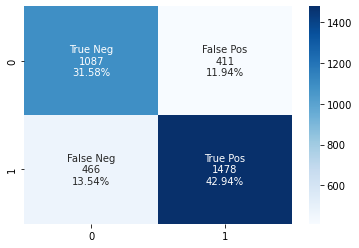

In [64]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                CM.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     CM.flatten()/np.sum(CM)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(CM, annot=labels, fmt='', cmap='Blues')

### Courbe roc 

La courbe ROC (Receiver Operating Characteristic) est un graphique du taux de vrais positifs par rapport au taux de faux positifs. Il montre le compromis entre sensibilité et spécificité.

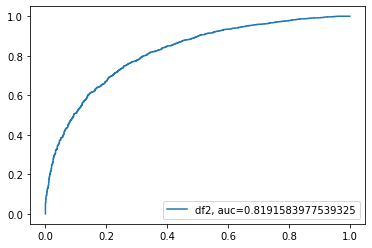

In [65]:
from sklearn import metrics
y_pred_proba = rfe.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)
plt.plot(fpr,tpr,label="df2, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### ACCURACY RATE, ERROR RATE & F1-SCORE

In [66]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import matthews_corrcoef
from sklearn import metrics

In [67]:
Accuracy_Rate = accuracy_score(Y_test, Y_pred)
Error_rate = 1 - Accuracy_Rate
F1_score_logreg = f1_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
CK = cohen_kappa_score (Y_test,Y_pred)
MC = matthews_corrcoef(Y_test,Y_pred)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)

print("precision : {:.2f}".format(precision))
print("recall : {:.2f}".format(recall))
print("Accuracy rate: ", Accuracy_Rate)
print("Error rate: ", Error_rate)
print("F1_score: ", F1_score_logreg)
print("CK:", CK)
print("MC:", MC)
print("AUC:", auc)

precision : 0.78
recall : 0.76
Accuracy rate:  0.7452062754212667
Error rate:  0.2547937245787333
F1_score:  0.7711974954343856
CK: 0.4838842597927696
MC: 0.4841379322459371
AUC: 0.8191583977539325


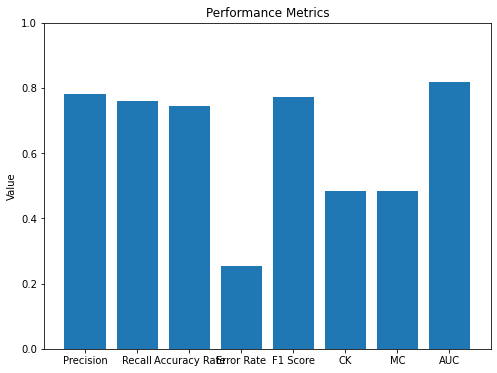

In [68]:
# create a list of metric names and values
metric_names = ["Precision", "Recall", "Accuracy Rate", "Error Rate", "F1 Score", "CK", "MC","AUC"]
metric_values = [precision, recall, Accuracy_Rate, Error_rate, F1_score_logreg, CK, MC,auc]

# create a bar chart
fig, ax = plt.subplots(figsize=(8,6))
ax.bar(metric_names, metric_values)
ax.set_ylabel('Value')
ax.set_ylim([0,1])
ax.set_title('Performance Metrics')
plt.show()

# Construction du modèle SVM (Support Vector Machine) : modèle linéaire

Le modèle SVM (Support Vector Machine) est un modèle d'apprentissage supervisé utilisé pour la classification et la régression. L'objectif de ce modèle est de trouver une frontière de décision qui sépare les données en deux classes distinctes avec la plus grande marge possible.

Pour ce faire, le modèle SVM utilise un hyperplan qui sépare les données en deux classes en maximisant la marge, c'est-à-dire la distance entre l'hyperplan et les points les plus proches de chaque classe. Les points les plus proches de l'hyperplan sont appelés vecteurs de support, d'où le nom de Support Vector Machine.

Le modèle SVM peut être utilisé pour la classification binaire et multiclasse, ainsi que pour la régression. Pour la classification binaire, le modèle SVM linéaire utilise une fonction d'activation de type "step function" tandis que les modèles SVM non linéaires utilisent des fonctions d'activation non linéaires telles que le noyau gaussien.

Le modèle SVM a de bonnes performances dans la classification de données linéairement et non linéairement séparables. Cependant, il peut être sensible aux données bruyantes et peut être coûteux en termes de temps de calcul pour de grandes quantités de données.

### SVM : RFE

In [69]:
from sklearn.svm import SVC

classifier2 = SVC(kernel= 'linear', C=0.01, gamma='scale',random_state = 0, probability= True)

In [70]:
from sklearn.feature_selection import RFE

# Créer un objet RFE
rfe2 = RFE(estimator=classifier2, n_features_to_select=13)

# Adapter l'objet RFE aux données
rfe2.fit(X_train, Y_train )

RFE(estimator=SVC(C=0.01, kernel='linear', probability=True, random_state=0),
    n_features_to_select=13)

In [71]:
# Get the mask of selected features
feature_mask2 = rfe2.get_support()

# Get the names of the selected features
selected_feature_names2 = X_train.columns[feature_mask]

# Create a new dataframe with the selected feature names
selected_features_df2 = pd.DataFrame(selected_feature_names2, columns=['Selected Features'])

# Print the selected feature names
print(selected_features_df2)

                         Selected Features
0                                    SEX_M
1                        Biologie médicale
2   Service qualité et gestion des risques
3                KARASEK_QUANTITE_RAPIDITE
4     KARASEK_MORCELLEMENT_IMPREVISIBILITE
5          KARASEK_LATITUDE_MARGEMANOEUVRE
6           KARASEK_UTILISATION_COMPETENCE
7                 KARASEK_DVLPT_COMPETENCE
8                                    CESD1
9                                    CESD7
10                                  CESD20
11                                   CESD4
12                                   CESD8


### LES PARAMETRES

#Noyau (kernel) : le noyau est une fonction mathématique qui transforme les données d'entrée (vecteurs) dans un espace de dimension supérieure, où elles sont plus facilement séparables. Les noyaux les plus couramment utilisés sont le noyau linéaire (Linear kernel), le noyau RBF (Radial basis function kernel), le noyau polynomial (Polynomial kernel), et le noyau sigmoidal (Sigmoid kernel).

#C : C est un paramètre de régularisation qui contrôle la pénalité appliquée aux erreurs de classification. Un C faible permettra une certaine classification incorrecte en échange d'une surface de décision plus simple, tandis qu'un C élevé donnera une surface de décision plus complexe, en essayant de classifier toutes les données correctement. C agit donc comme une mesure d'équilibre entre la simplicité de la surface de décision et la précision de classification.

#Gamma : Gamma est un paramètre qui définit la "distance" d'influence de chaque point d'entraînement dans la fonction de décision. Plus gamma est grand, plus la surface de décision sera "pointue" et plus chaque point d'entraînement aura une influence étendue. Un gamma plus faible aura l'effet inverse, conduisant à une surface de décision plus douce et plus régulière.

#Probability est un paramètre optionnel pour les modèles SVM de la librairie scikit-learn. Ce paramètre permet d'activer la sortie des probabilités des prédictions du modèle.

Par défaut, les modèles SVM de scikit-learn ne fournissent pas les probabilités des prédictions, mais plutôt une prédiction binaire (0 ou 1) pour chaque exemple. Si le paramètre probability est activé, le modèle SVM utilise une méthode de calibration pour estimer les probabilités des prédictions.

### Faire de nouvelles prédictions 

In [72]:
Y2_pred = rfe2.predict(X_test)
print(Y_test)
print(Y2_pred)

3209    0
3840    0
6683    0
2030    0
9279    1
       ..
8161    1
9205    0
8932    1
3761    1
6002    0
Name: BURNOUT_BIN, Length: 3442, dtype: int64
[0 1 0 ... 1 1 0]


In [73]:
with np.printoptions(threshold=np.inf):
    print(Y_test)

3209    0
3840    0
6683    0
2030    0
9279    1
       ..
8161    1
9205    0
8932    1
3761    1
6002    0
Name: BURNOUT_BIN, Length: 3442, dtype: int64


In [74]:
with np.printoptions(threshold=np.inf):
    print(Y2_pred)

[0 1 0 0 0 1 1 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 1 0 0 0 1 0 1 1 0 1 0 1 0 0 0
 0 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 0 1 0 1 1 0 0 0 1 1 0 0 1 1 1 1
 1 1 1 1 0 1 1 1 1 0 1 1 1 0 0 0 1 0 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 1 0
 0 1 1 0 1 0 1 0 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 0 1 0 1 0 0 0 1 1 0 0 0 1
 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 0 1 0 1 1 0 1 0 1 1 0
 1 0 1 1 0 1 1 0 1 1 1 0 1 1 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1 0 1 0 0 1 1 1 0
 0 0 1 0 1 0 1 1 1 1 1 0 0 0 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 1 0 0 1
 0 0 1 1 0 1 0 1 0 1 0 1 1 0 0 1 1 1 1 1 1 0 0 0 0 1 0 0 0 1 1 1 0 1 1 1 1
 1 0 0 1 1 0 1 0 0 1 1 1 0 1 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 0 1 1 0 0 1 0 1
 0 0 1 0 1 1 1 0 1 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0
 1 0 0 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 0 1 0 1 0 1 1 0 0
 0 0 1 0 1 1 0 1 0 1 1 0 1 0 1 0 0 1 0 0 0 1 1 0 0 1 1 1 1 0 1 1 1 0 1 0 1
 0 1 1 0 1 1 1 0 1 0 0 1 1 1 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 1 0 1 0 1 1
 1 0 0 1 1 1 0 1 1 1 1 0 

### MATRICE DE CONFUSION

In [75]:
from sklearn.metrics import confusion_matrix
CM2 = confusion_matrix(Y_test, Y2_pred)
CM2

array([[1111,  387],
       [ 480, 1464]], dtype=int64)

<AxesSubplot:>

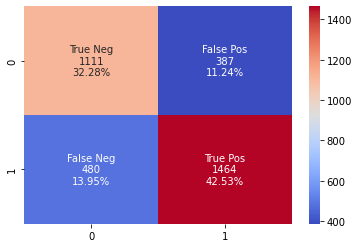

In [76]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                CM2.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     CM2.flatten()/np.sum(CM2)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(CM2, annot=labels, fmt='', cmap='coolwarm')

In [77]:
print(Y_test.shape)
print(CM2)

(3442,)
[[1111  387]
 [ 480 1464]]


# Courbe roc 

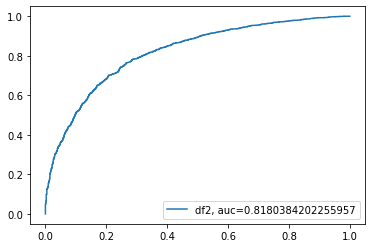

In [78]:
y_pred_proba2 = rfe2.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba2)
auc = metrics.roc_auc_score(Y_test, y_pred_proba2)
plt.plot(fpr,tpr,label="df2, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### ACCURACY RATE, ERROR RATE & F1-SCORE

In [79]:
Accuracy_Rate2 = accuracy_score(Y_test, Y2_pred)
Error_rate2 = 1 - Accuracy_Rate2  # Change variable name to Error_rate2
F1_score_logreg2 = f1_score(Y_test, Y2_pred)
precision2 = precision_score(Y_test, Y2_pred)
recall2 = recall_score(Y_test, Y2_pred)
CK2 = cohen_kappa_score(Y_test, Y2_pred)
MC2 = matthews_corrcoef(Y_test, Y2_pred)
auc2 = metrics.roc_auc_score(Y_test, y_pred_proba2)

print("precision : {:.2f}".format(precision2))
print("recall : {:.2f}".format(recall2))
print("Accuracy rate: ", Accuracy_Rate2)
print("Error rate: ", Error_rate2)
print("F1_score: ", F1_score_logreg2)
print("CK:", CK2)
print("MC:", MC2)
print("AUC:", auc2)


precision : 0.79
recall : 0.75
Accuracy rate:  0.7481115630447415
Error rate:  0.25188843695525853
F1_score:  0.7715415019762846
CK: 0.49124350333515066
MC: 0.4919766415152822
AUC: 0.8180384202255957


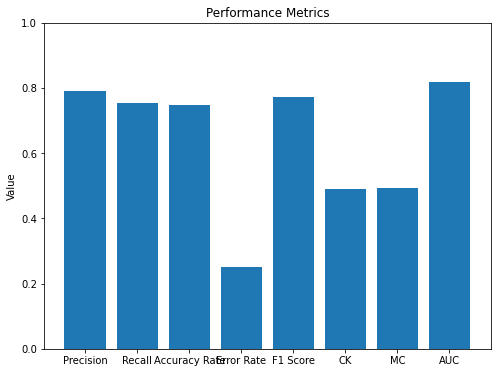

In [80]:
# create a list of metric names and values
metric_names = ["Precision", "Recall", "Accuracy Rate", "Error Rate", "F1 Score", "CK", "MC","AUC"]
metric_values = [precision2, recall2, Accuracy_Rate2, Error_rate2, F1_score_logreg2, CK2, MC2,auc2]

# create a bar chart
fig, ax = plt.subplots(figsize=(8,6))
ax.bar(metric_names, metric_values)
ax.set_ylabel('Value')
ax.set_ylim([0,1])
ax.set_title('Performance Metrics')
plt.show()

# Construction du modèle Random Forest : modèle non linéaire

Le modèle de Random Forest est un algorithme d'apprentissage supervisé en Machine Learning qui utilise une combinaison d'arbres de décision pour créer un modèle prédictif.

L'idée est de construire plusieurs arbres de décision, en utilisant différents échantillons d'entraînement et des sous-ensembles de fonctionnalités, afin de créer un ensemble de modèles qui travaillent ensemble pour donner une prédiction précise. Les prédictions de chaque arbre sont ensuite agrégées pour donner une prédiction finale.

Le modèle de Random Forest peut être utilisé pour la classification et la régression, et est particulièrement utile pour les ensembles de données avec de nombreuses caractéristiques, y compris des variables continues et catégorielles. Il est également robuste aux valeurs manquantes et aux données bruyantes.

Les avantages du modèle de Random Forest sont sa précision de prédiction, sa capacité à traiter les données manquantes et bruyantes, et sa capacité à gérer de grandes quantités de données. Cependant, il peut être plus lent à entraîner que d'autres modèles et peut être plus difficile à interpréter en raison de la complexité de l'ensemble d'arbres de décision.

### RF: Boruta

In [81]:
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy

In [82]:
X_train_np = X_train.to_numpy()

In [83]:
# Initialiser le modèle de classification Random Forest
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1)

# let's initialize Boruta
feat_selector = BorutaPy(
    verbose=2,
    estimator=rf,
    n_estimators='auto',
    max_iter=10  # number of iterations to perform
)

# train Boruta
# N.B.: X and y must be numpy arrays
#feat_selector.fit(np.array(X_train), np.array(Y_train))

In [84]:
# Select features using BorutaPy
feat_selector.fit(X_train.values, Y_train.values.ravel())

# Get selected features
X_train_selected = feat_selector.transform(X_train.values)
X_test_selected = feat_selector.transform(X_test.values)

# Train a machine learning model using the selected features
model = RandomForestClassifier()
model.fit(X_train_selected, Y_train)

# Get selected features
X_train_selected = feat_selector.transform(X_train.values)

# Print selected feature names
print(selected_feature_names)

Iteration: 	1 / 10
Confirmed: 	0
Tentative: 	128
Rejected: 	0
Iteration: 	2 / 10
Confirmed: 	0
Tentative: 	128
Rejected: 	0
Iteration: 	3 / 10
Confirmed: 	0
Tentative: 	128
Rejected: 	0
Iteration: 	4 / 10
Confirmed: 	0
Tentative: 	128
Rejected: 	0
Iteration: 	5 / 10
Confirmed: 	0
Tentative: 	128
Rejected: 	0
Iteration: 	6 / 10
Confirmed: 	0
Tentative: 	128
Rejected: 	0
Iteration: 	7 / 10
Confirmed: 	0
Tentative: 	128
Rejected: 	0
Iteration: 	8 / 10
Confirmed: 	0
Tentative: 	14
Rejected: 	114
Iteration: 	9 / 10
Confirmed: 	1
Tentative: 	13
Rejected: 	114


BorutaPy finished running.

Iteration: 	10 / 10
Confirmed: 	1
Tentative: 	10
Rejected: 	114
Index(['SEX_M', 'Biologie médicale', 'Service qualité et gestion des risques',
       'KARASEK_QUANTITE_RAPIDITE', 'KARASEK_MORCELLEMENT_IMPREVISIBILITE',
       'KARASEK_LATITUDE_MARGEMANOEUVRE', 'KARASEK_UTILISATION_COMPETENCE',
       'KARASEK_DVLPT_COMPETENCE', 'CESD1', 'CESD7', 'CESD20', 'CESD4',
       'CESD8'],
      dtype='object')


### LES PARAMETRES 

Les paramètres utilisés dans ce modèle Random Forest sont :

#n_estimators : le nombre d'arbres de décision à construire. Plus ce nombre est grand, plus le modèle sera robuste, mais cela peut augmenter le temps d'entraînement. La valeur par défaut est 100.

#max_depth : la profondeur maximale de chaque arbre de décision. Une valeur plus grande peut permettre au modèle de mieux s'adapter aux données d'entraînement, mais peut également entraîner un surajustement. La valeur par défaut est None, ce qui signifie que les arbres sont développés jusqu'à ce que toutes les feuilles soient pures ou que le nombre minimal d'échantillons requis pour diviser une feuille soit atteint.

#min_samples_split : le nombre minimum d'échantillons requis pour diviser un nœud interne. Si le nombre d'échantillons dans un nœud est inférieur à ce paramètre, le nœud ne sera pas divisé. Une valeur plus grande peut empêcher le modèle de surajuster, mais peut également réduire les performances. La valeur par défaut est 2.

#min_samples_leaf : le nombre minimum d'échantillons requis pour être dans une feuille. Si une feuille contient moins d'échantillons que ce paramètre, la division du nœud est annulée. Comme min_samples_split, une valeur plus grande peut empêcher le modèle de surajuster, mais peut également réduire les performances. La valeur par défaut est 1.

#random_state : permet de fixer la graine aléatoire pour la reproductibilité des résultats. La valeur par défaut est None, ce qui signifie que chaque exécution peut donner des résultats différents.


### Faire des prédictions sur l'ensemble de test

In [85]:
Y6_pred = model.predict(X_test_selected)
print(Y_test)
print(Y6_pred)

3209    0
3840    0
6683    0
2030    0
9279    1
       ..
8161    1
9205    0
8932    1
3761    1
6002    0
Name: BURNOUT_BIN, Length: 3442, dtype: int64
[0 1 1 ... 1 1 0]


In [86]:
with np.printoptions(threshold=np.inf):
    print(Y_test)

3209    0
3840    0
6683    0
2030    0
9279    1
       ..
8161    1
9205    0
8932    1
3761    1
6002    0
Name: BURNOUT_BIN, Length: 3442, dtype: int64


In [87]:
with np.printoptions(threshold=np.inf):
    print(Y6_pred)

[0 1 1 0 1 1 1 1 0 1 0 1 1 0 0 1 1 1 1 0 1 1 0 0 1 0 1 0 0 1 0 1 1 1 0 0 0
 1 0 1 1 0 1 1 1 0 1 1 1 1 1 0 1 0 0 1 1 1 0 1 0 1 0 0 0 0 1 1 0 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 0 1 1 1
 0 1 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0
 1 1 0 1 1 1 0 1 1 0 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 0 0 1 1 1 0 1 0 0 1 1 0
 0 0 1 1 0 1 1 0 1 1 1 0 1 0 0 1 0 1 1 1 0 0 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1
 0 0 1 0 0 0 1 0 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 1 0 1 1
 0 0 1 1 0 0 0 1 0 1 0 1 1 0 0 1 1 1 1 1 1 0 0 0 0 1 1 0 0 1 1 1 1 1 1 1 1
 1 0 1 1 1 0 0 0 0 1 1 1 0 1 0 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0
 0 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 1 0
 1 0 0 1 0 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 0 1 1 1 0 1 1 0 0
 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 0 1 1 0 0 1 0 0 1 1 1 0 1 0 1 0 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 0 0 1
 1 0 1 1 1 0 1 1 1 1 1 0 

In [88]:
from sklearn.metrics import confusion_matrix
CM6 = confusion_matrix(Y_test, Y6_pred)
CM6

array([[ 821,  677],
       [ 371, 1573]], dtype=int64)

<AxesSubplot:>

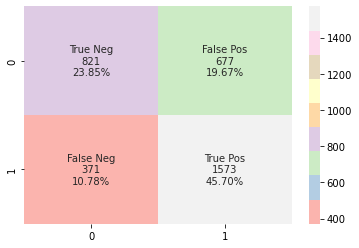

In [89]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                CM6.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     CM6.flatten()/np.sum(CM6)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(CM6, annot=labels, fmt='', cmap='Pastel1')

In [90]:
print(Y_test.shape)
print(CM6)

(3442,)
[[ 821  677]
 [ 371 1573]]


# Courbe roc 

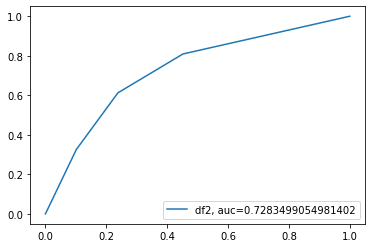

In [91]:
y_pred_proba6 = model.predict_proba(X_test_selected)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba6)
auc = metrics.roc_auc_score(Y_test, y_pred_proba6)
plt.plot(fpr,tpr,label="df2, auc="+str(auc))
plt.legend(loc=4)  #Y6_pred = model.predict(X_test_selected)
plt.show()
# La courbe roc montre la spécifité et la sensibilité

### ACCURACY RATE, ERROR RATE & F1-SCORE

In [92]:
Accuracy_Rate6 = accuracy_score(Y_test, Y6_pred)
Error_rate6 = 1 - Accuracy_Rate6  # Change variable name to Error_rate2
F1_score_logreg6 = f1_score(Y_test, Y6_pred)
precision6 = precision_score(Y_test, Y6_pred)
recall6 = recall_score(Y_test, Y6_pred)
CK6 = cohen_kappa_score(Y_test, Y6_pred)
MC6 = matthews_corrcoef(Y_test, Y6_pred)
auc3 = metrics.roc_auc_score(Y_test, y_pred_proba6)

print("precision : {:.2f}".format(precision6))
print("recall : {:.2f}".format(recall6))
print("Accuracy rate: ", Accuracy_Rate6)
print("Error rate: ", Error_rate6)
print("F1_score: ", F1_score_logreg6)
print("CK:", CK6)
print("MC:", MC6)
print("AUC:", auc3)

precision : 0.70
recall : 0.81
Accuracy rate:  0.6955258570598489
Error rate:  0.30447414294015107
F1_score:  0.7501192179303767
CK: 0.36579187404223956
MC: 0.37222966420382314
AUC: 0.7283499054981402


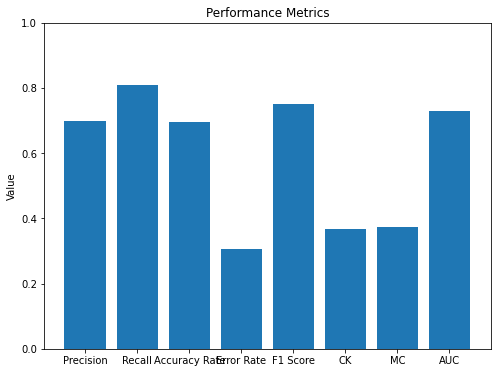

In [93]:
# create a list of metric names and values
metric_names = ["Precision", "Recall", "Accuracy Rate", "Error Rate", "F1 Score", "CK", "MC","AUC"]
metric_values = [precision6, recall6, Accuracy_Rate6, Error_rate6, F1_score_logreg6, CK6, MC6,auc3]

# create a bar chart
fig, ax = plt.subplots(figsize=(8,6))
ax.bar(metric_names, metric_values)
ax.set_ylabel('Value')
ax.set_ylim([0,1])
ax.set_title('Performance Metrics')
plt.show()

# Construction du modèle Gradient Boosting : modèle non linéaire

Le Gradient Boosting est une technique d'apprentissage automatique utilisée pour résoudre des problèmes de régression et de classification. C'est une méthode d'ensemble qui combine plusieurs modèles de prédiction plus faibles (souvent des arbres de décision) pour former un modèle plus fort.

Le Gradient Boosting fonctionne en ajustant successivement les modèles pour minimiser les erreurs de prédiction du modèle précédent. À chaque étape, le Gradient Boosting calcule les résidus (différences entre les valeurs réelles et prédites) du modèle précédent, puis ajuste un nouveau modèle pour prédire ces résidus. Le résultat final est une combinaison pondérée de tous les modèles.

Le Gradient Boosting est efficace pour résoudre les problèmes de classification et de régression non linéaires, et est largement utilisé dans de nombreux domaines tels que la finance, la biologie et l'analyse de données. Cependant, il peut être assez sensible aux hyperparamètres et nécessite une optimisation minutieuse pour atteindre les meilleures performances.

### GB: Boruta

In [94]:
from sklearn.ensemble import GradientBoostingClassifier

In [95]:
# Initialisation du modèle de classification Gradient Boosting
gb = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100, min_samples_leaf=1, max_features=None,
                                           max_depth=3, min_samples_split=2, random_state=42)

# Entraînement du modèle sur l'ensemble d'entraînement
#gb_classifier.fit(X_train, Y_train)


In [96]:
# let's initialize Boruta
feat_selector2 = BorutaPy(
    verbose=2,
    estimator=gb,
    n_estimators='auto',
    max_iter=10  # number of iterations to perform
)

# train Boruta
# N.B.: X and y must be numpy arrays
#feat_selector.fit(np.array(X_train), np.array(Y_train))

In [97]:
# Select features using BorutaPy
feat_selector2.fit(X_train.values, Y_train.values.ravel())

# Get selected features
X_train_selected = feat_selector2.transform(X_train.values)
X_test_selected = feat_selector2.transform(X_test.values)

# Train a machine learning model using the selected features
model2 = GradientBoostingClassifier()
model2.fit(X_train_selected, Y_train)

# Get selected features
X_train_selected = feat_selector2.transform(X_train.values)
# Print selected feature names
print(selected_feature_names)

Iteration: 	1 / 10
Confirmed: 	0
Tentative: 	128
Rejected: 	0
Iteration: 	2 / 10
Confirmed: 	0
Tentative: 	128
Rejected: 	0
Iteration: 	3 / 10
Confirmed: 	0
Tentative: 	128
Rejected: 	0
Iteration: 	4 / 10
Confirmed: 	0
Tentative: 	128
Rejected: 	0
Iteration: 	5 / 10
Confirmed: 	0
Tentative: 	128
Rejected: 	0
Iteration: 	6 / 10
Confirmed: 	0
Tentative: 	128
Rejected: 	0
Iteration: 	7 / 10
Confirmed: 	0
Tentative: 	128
Rejected: 	0
Iteration: 	8 / 10
Confirmed: 	12
Tentative: 	4
Rejected: 	112
Iteration: 	9 / 10
Confirmed: 	12
Tentative: 	4
Rejected: 	112


BorutaPy finished running.

Iteration: 	10 / 10
Confirmed: 	12
Tentative: 	1
Rejected: 	112
Index(['SEX_M', 'Biologie médicale', 'Service qualité et gestion des risques',
       'KARASEK_QUANTITE_RAPIDITE', 'KARASEK_MORCELLEMENT_IMPREVISIBILITE',
       'KARASEK_LATITUDE_MARGEMANOEUVRE', 'KARASEK_UTILISATION_COMPETENCE',
       'KARASEK_DVLPT_COMPETENCE', 'CESD1', 'CESD7', 'CESD20', 'CESD4',
       'CESD8'],
      dtype='object')


#### LES PARAMETRES 

#n_estimators : C'est le nombre d'arbres de décision dans le modèle. Plus il y a d'arbres, plus le modèle peut apprendre de relations complexes entre les variables d'entrée et les sorties souhaitées. Cependant, cela peut également rendre le modèle plus complexe et augmenter le risque de surapprentissage. Il est donc important de trouver un équilibre entre le nombre d'estimateurs et les performances de prédiction.

#learning_rate : Il s'agit du taux d'apprentissage, qui détermine la vitesse à laquelle le modèle apprend des erreurs de prédiction. Un taux d'apprentissage plus élevé signifie que le modèle s'adapte plus rapidement aux erreurs, mais cela peut également augmenter le risque de surapprentissage. Un taux d'apprentissage plus faible signifie que le modèle prend plus de temps pour s'adapter aux erreurs, mais cela peut également aider à prévenir le surapprentissage.

#max_depth : C'est la profondeur maximale de chaque arbre de décision. Une profondeur plus grande signifie que chaque arbre peut apprendre des relations plus complexes entre les variables d'entrée et les sorties souhaitées, mais cela peut également rendre le modèle plus complexe et augmenter le risque de surapprentissage. Il est donc important de trouver un équilibre entre la profondeur maximale et les performances de prédiction.

#min_samples_split : C'est le nombre minimal d'échantillons requis pour diviser un nœud. Si le nombre d'échantillons dans un nœud est inférieur à cette valeur, le nœud ne sera pas divisé. Cela peut aider à prévenir le surapprentissage en limitant le nombre de nœuds créés et en favorisant les divisions qui ont une contribution significative à la prédiction.

#min_samples_leaf : C'est le nombre minimal d'échantillons requis pour être une feuille. Si le nombre d'échantillons dans une feuille est inférieur à cette valeur, la feuille sera fusionnée avec une autre feuille. Cela peut aider à prévenir le surapprentissage en limitant le nombre de feuilles créées et en favorisant les feuilles qui ont une contribution significative à la prédiction.

#max_features : C'est le nombre maximal de fonctionnalités à considérer lors de la recherche de la meilleure division. Si None, alors toutes les fonctionnalités sont considérées, sinon, une valeur entière doit être passée. Limiter le nombre de fonctionnalités peut aider à réduire la complexité du modèle et à prévenir le surapprentissage.

### Faire des prédictions sur l'ensemble de test

In [98]:
Y8_pred = model2.predict(X_test_selected)
print(Y_test)
print(Y8_pred)

3209    0
3840    0
6683    0
2030    0
9279    1
       ..
8161    1
9205    0
8932    1
3761    1
6002    0
Name: BURNOUT_BIN, Length: 3442, dtype: int64
[0 1 0 ... 1 1 0]


In [99]:
from sklearn.metrics import accuracy_score

In [100]:
# Calcul de la précision du modèle
accuracy = accuracy_score(Y_test, Y8_pred)
print("Précision : ", accuracy)

Précision :  0.7391051714119697


In [101]:
with np.printoptions(threshold=np.inf):
    print(Y_test)

3209    0
3840    0
6683    0
2030    0
9279    1
       ..
8161    1
9205    0
8932    1
3761    1
6002    0
Name: BURNOUT_BIN, Length: 3442, dtype: int64


In [102]:
with np.printoptions(threshold=np.inf):
    print(Y8_pred)

[0 1 0 0 0 0 1 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 0 1 0 1 1 0 1 0 1 1 0 0
 0 0 1 1 0 1 0 1 0 1 1 1 0 1 0 0 0 0 1 1 1 0 1 0 1 0 0 0 0 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 0 1 0 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 1 0
 0 1 1 0 1 0 1 0 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 0 1 0 1 0 0 0 1 1 0 0 0 1
 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 0 0 1 0 1 1 0 0 1 1 1 0
 0 0 1 1 0 1 1 0 1 1 1 0 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1
 0 0 1 0 0 0 1 1 1 1 1 0 0 0 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 1 0 1 1
 0 0 1 1 1 1 0 1 0 1 0 1 1 0 0 1 1 1 1 1 1 1 0 0 0 1 0 0 0 0 1 1 0 1 1 1 1
 1 0 0 1 1 0 1 0 0 1 1 1 0 1 0 1 1 0 0 0 1 1 0 1 0 1 1 1 1 0 1 1 0 0 1 0 0
 0 0 1 0 1 1 1 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 1
 1 0 0 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 0 1 0 1 0 1 1 0 0
 1 0 1 0 1 1 0 1 1 1 1 0 1 0 1 0 1 1 0 0 0 1 1 0 0 1 1 1 1 0 1 1 1 0 1 0 1
 0 1 1 0 1 1 1 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 0 1 0 1 1 0 0 1 1 1 1 1 0 1 1
 1 0 0 1 1 1 0 1 1 1 1 0 

In [103]:
from sklearn.metrics import confusion_matrix
CM8 = confusion_matrix(Y_test, Y8_pred)
CM8

array([[1058,  440],
       [ 458, 1486]], dtype=int64)

<AxesSubplot:>

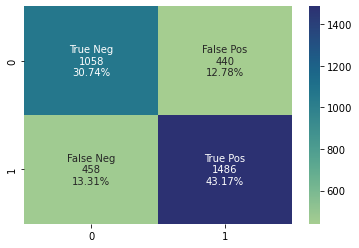

In [104]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                CM8.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     CM8.flatten()/np.sum(CM8)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(CM8, annot=labels, fmt='', cmap='crest')

In [105]:
print(Y_test.shape)
print(CM8)

(3442,)
[[1058  440]
 [ 458 1486]]


# Courbe roc 

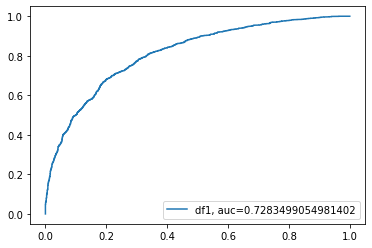

In [106]:
y_pred_proba8 = model2.predict_proba(X_test_selected)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba8)
auc4 = metrics.roc_auc_score(Y_test, y_pred_proba8)
plt.plot(fpr,tpr,label="df1, auc="+str(auc))
plt.legend(loc=4)
plt.show()
# La courbe roc montre la spécifité et la sensibilité

### ACCURACY RATE, ERROR RATE & F1-SCORE

In [107]:
Accuracy_Rate8 = accuracy_score(Y_test, Y8_pred)
Error_rate8 = 1 - Accuracy_Rate8  # Change variable name to Error_rate2
F1_score_logreg8 = f1_score(Y_test, Y8_pred)
precision8 = precision_score(Y_test, Y8_pred)
recall8 = recall_score(Y_test, Y8_pred)
CK8 = cohen_kappa_score(Y_test, Y8_pred)
MC8 = matthews_corrcoef(Y_test, Y8_pred)
auc4 = metrics.roc_auc_score(Y_test, y_pred_proba8)

print("precision : {:.2f}".format(precision8))
print("recall : {:.2f}".format(recall8))
print("Accuracy rate: ", Accuracy_Rate8)
print("Error rate: ", Error_rate8)
print("F1_score: ", F1_score_logreg8)
print("CK:", CK8)
print("AUC:", auc4)

precision : 0.77
recall : 0.76
Accuracy rate:  0.7391051714119697
Error rate:  0.26089482858803026
F1_score:  0.7679586563307494
CK: 0.47003044450068343
AUC: 0.8137070277516798


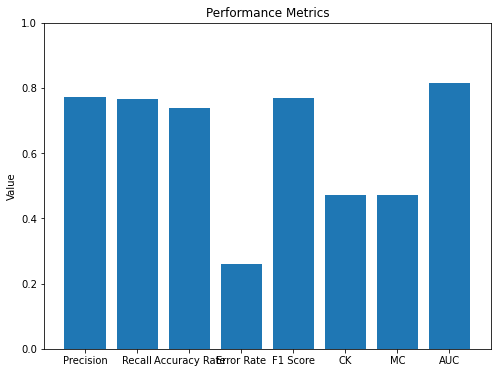

In [108]:
# create a list of metric names and values
metric_names = ["Precision", "Recall", "Accuracy Rate", "Error Rate", "F1 Score", "CK", "MC","AUC"]
metric_values = [precision8, recall8, Accuracy_Rate8, Error_rate8, F1_score_logreg8, CK8, MC8,auc4]

# create a bar chart
fig, ax = plt.subplots(figsize=(8,6))
ax.bar(metric_names, metric_values)
ax.set_ylabel('Value')
ax.set_ylim([0,1])
ax.set_title('Performance Metrics')
plt.show()

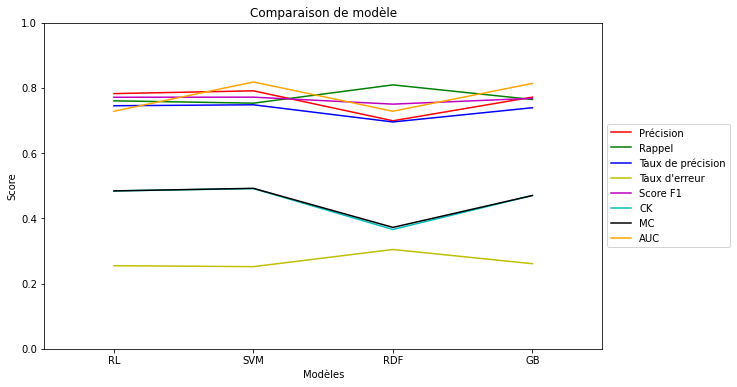

In [109]:
# Données de performance pour chaque modèle
model_data = {
    'RL': {
        'Précision': precision,
        'Rappel': recall,
        'Taux de précision': Accuracy_Rate,
        'Taux d\'erreur': Error_rate,
        'Score F1': F1_score_logreg,
        'CK': CK,
        'MC': MC,
        'AUC': auc
    },
    'SVM': {
        'Précision': precision2,
        'Rappel': recall2,
        'Taux de précision': Accuracy_Rate2,
        'Taux d\'erreur': Error_rate2,
        'Score F1': F1_score_logreg2,
        'CK': CK2,
        'MC': MC2,
        'AUC': auc2
    },
    'RDF': {
        'Précision': precision6,
        'Rappel': recall6,
        'Taux de précision': Accuracy_Rate6,
        'Taux d\'erreur': Error_rate6,
        'Score F1': F1_score_logreg6,
        'CK': CK6,
        'MC': MC6,
        'AUC': auc3
    },
    'GB': {
        'Précision': precision8,
        'Rappel': recall8,
        'Taux de précision': Accuracy_Rate8,
        'Taux d\'erreur': Error_rate8,
        'Score F1': F1_score_logreg8,
        'CK': CK8,
        'MC': MC8,
        'AUC': auc4
    }
}

# Créer une nouvelle figure
plt.figure(figsize=(10, 6))

# Liste des métriques de performance à tracer
performance_metrics = list(model_data['RL'].keys())

# Couleurs pour chaque métrique
colors = ['r', 'g', 'b', 'y', 'm', 'c', 'k','#FFA500']

# Tracer chaque métrique de performance pour chaque modèle
for i, metric in enumerate(performance_metrics):
    values = [model_data[model][metric] for model in model_data]
    plt.plot(list(model_data.keys()), values, color=colors[i], label=metric)

# Ajouter une légende et un titre
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Comparaison de modèle')

# Ajuster les limites des axes
plt.ylim([0, 1])
plt.xlim([-0.5, len(model_data)-0.5])

# Nommer les axes
plt.xlabel('Modèles')
plt.ylabel('Score')


# Afficher le graphique
plt.show()

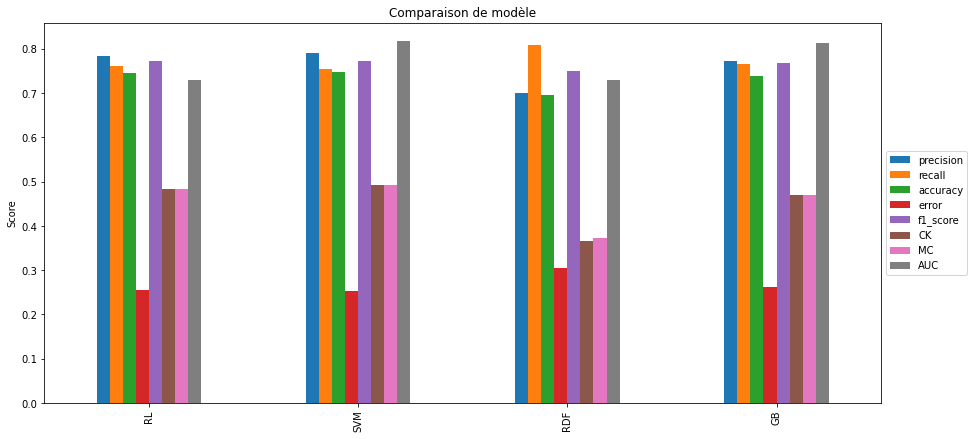

In [110]:
# Données de performance pour chaque modèle
model_data = {
    'RL': {
        'precision': precision,
        'recall': recall,
        'accuracy': Accuracy_Rate,
        'error': Error_rate,
        'f1_score': F1_score_logreg,
        'CK': CK,
        'MC': MC,
        'AUC': auc
    },
    'SVM': {
        'precision': precision2,
        'recall': recall2,
        'accuracy': Accuracy_Rate2,
        'error': Error_rate2,
        'f1_score': F1_score_logreg2,
        'CK': CK2,
        'MC': MC2,
        'AUC': auc2
    },
    'RDF': {
        'precision': precision6,
        'recall': recall6,
        'accuracy': Accuracy_Rate6,
        'error': Error_rate6,
        'f1_score': F1_score_logreg6,
        'CK': CK6,
        'MC': MC6,
        'AUC': auc3
    },
    'GB': {
        'precision': precision8,
        'recall': recall8,
        'accuracy': Accuracy_Rate8,
        'error': Error_rate8,
        'f1_score': F1_score_logreg8,
        'CK': CK8,
        'MC': MC8,
        'AUC': auc4
    }
}

# Créer un DataFrame pour chaque métrique de performance
precision_df = pd.DataFrame.from_dict({k: v['precision'] for k, v in model_data.items()}, orient='index')
recall_df = pd.DataFrame.from_dict({k: v['recall'] for k, v in model_data.items()}, orient='index')
accuracy_df = pd.DataFrame.from_dict({k: v['accuracy'] for k, v in model_data.items()}, orient='index')
error_df = pd.DataFrame.from_dict({k: v['error'] for k, v in model_data.items()}, orient='index')
f1_score_df = pd.DataFrame.from_dict({k: v['f1_score'] for k, v in model_data.items()}, orient='index')
CK_df = pd.DataFrame.from_dict({k: v['CK'] for k, v in model_data.items()}, orient='index')
MC_df = pd.DataFrame.from_dict({k: v['MC'] for k, v in model_data.items()}, orient='index')
AUC_df = pd.DataFrame.from_dict({k: v['AUC'] for k, v in model_data.items()}, orient='index')

# Placer tous les tableaux dans une liste pour les concaténer horizontalement
dfs = [precision_df, recall_df, accuracy_df, error_df, f1_score_df, CK_df, MC_df, AUC_df]

# Concaténer horizontalement les tableaux pour créer un seul DataFrame
results_df = pd.concat(dfs, axis=1)

# Renommer les colonnes pour qu'elles correspondent aux métriques de performance
results_df.columns = ['precision', 'recall', 'accuracy', 'error', 'f1_score', 'CK', 'MC', 'AUC']

# Tracer les performances de chaque modèle pour chaque métrique
results_df.plot(kind='bar',figsize=(15, 7))
plt.title('Comparaison de modèle')
plt.ylabel('Score')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# DEEP LEARNING

### Artificial Neural Network (ANN)

Le réseau de neurones artificiels (ANN) est un modèle d'apprentissage en profondeur (Deep Learning) qui vise à imiter le fonctionnement du cerveau humain pour résoudre des problèmes complexes tels que la reconnaissance de motifs, la classification et la prédiction. Le modèle est constitué de plusieurs couches de neurones artificiels, chacune avec une fonction d'activation qui permet au modèle de capturer des relations non linéaires dans les données.

L'ANN est généralement entraîné à l'aide de la méthode de la rétropropagation (backpropagation), qui ajuste les poids de chaque neurone pour minimiser la fonction de coût. Le modèle peut être utilisé pour la classification et la régression, et peut gérer des données structurées et non structurées telles que des images, des séquences de texte et des séries chronologiques.

Les avantages de l'ANN comprennent sa capacité à apprendre à partir de grandes quantités de données et à capturer des relations complexes dans les données. Cependant, l'entraînement du modèle peut être coûteux en termes de temps de calcul et de ressources de calcul nécessaires, et il peut être difficile d'interpréter les résultats du modèle.

In [111]:
import keras
from keras.models import Sequential # C'est le module qui va nous permettre d'initialiser le reseau de neuronne 
from keras.layers import Dense # C'est le module qui nous permet de créer les couches des réseaux de neuronne 
from keras.layers import Dropout

In [112]:
# Initialisation du réseau de neurones
classifier = Sequential()

# Ajout de la couche d'entrée et de la première couche cachée
classifier.add(Dense(units=65, activation='relu', input_dim=128,))
classifier.add(Dropout(0.2))

# Ajout de la deuxième couche cachée
classifier.add(Dense(units=32, activation='relu'))
classifier.add(Dropout(0.2))

# Ajout de la troisième couche cachée
classifier.add(Dense(units=16, activation='relu'))
classifier.add(Dropout(0.2))

# Ajout de la couche de sortie
classifier.add(Dense(units=1, activation='sigmoid'))

# Compilation du réseau de neurones
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entraînement du réseau de neurones
classifier.fit(X_train, Y_train, batch_size=10, epochs=100)


Epoch 1/100
689/689 [==============================] - 4s 3ms/step - loss: 0.5761 - accuracy: 0.6998
Epoch 2/100
689/689 [==============================] - 2s 4ms/step - loss: 0.5253 - accuracy: 0.7391
Epoch 3/100
689/689 [==============================] - 2s 3ms/step - loss: 0.5110 - accuracy: 0.7519
Epoch 4/100
689/689 [==============================] - 2s 3ms/step - loss: 0.4984 - accuracy: 0.7620
Epoch 5/100
689/689 [==============================] - 2s 3ms/step - loss: 0.4924 - accuracy: 0.7625
Epoch 6/100
689/689 [==============================] - 2s 3ms/step - loss: 0.4852 - accuracy: 0.7671
Epoch 7/100
689/689 [==============================] - 2s 4ms/step - loss: 0.4739 - accuracy: 0.7735
Epoch 8/100
689/689 [==============================] - 2s 3ms/step - loss: 0.4629 - accuracy: 0.7787
Epoch 9/100
689/689 [==============================] - 2s 3ms/step - loss: 0.4570 - accuracy: 0.7853
Epoch 10/100
689/689 [==============================] - 2s 4ms/step - loss: 0.4423 - accura

In [113]:
# Évaluer le modèle sur les données de test
loss, accuracy = classifier.evaluate(X_test, Y_test)
print("Perte (loss) sur les données de test: ", loss)
print("Accuracy sur les données de test: ", accuracy)

108/108 [==============================] - 1s 3ms/step - loss: 1.2897 - accuracy: 0.7080
Perte (loss) sur les données de test:  1.2897107601165771
Accuracy sur les données de test:  0.7080186009407043


In [114]:
# Evaluation de l'accuracy rate
Y_pred_9 = classifier.predict(X_test)
Accuracy_Rate9 = accuracy_score(Y_test, Y_pred_9.round())
print("Accuracy rate:", accuracy)

# Evaluation de l'error rate
Error_rate9 = 1 - accuracy
print("Error rate:", Error_rate9)

# Evaluation du F1-score
F1_score_ANN9 = f1_score(Y_test, Y_pred_9.round())
print("F1-score:", F1_score_ANN9)

108/108 [==============================] - 0s 2ms/step
Accuracy rate: 0.7080186009407043
Error rate: 0.29198139905929565
F1-score: 0.7347585114806017


In [115]:
precision9 = precision_score(Y_test, Y_pred_9.round())
recall9 = recall_score(Y_test,  Y_pred_9.round())
CK9 = cohen_kappa_score(Y_test,  Y_pred_9.round())
MC9 = matthews_corrcoef(Y_test, Y_pred_9.round())
auc5 = metrics.roc_auc_score(Y_test, Y_pred_9.round())

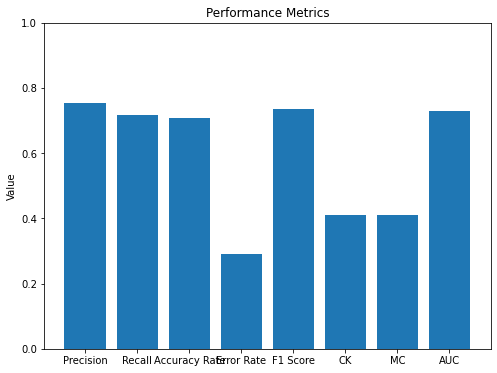

In [116]:
# create a list of metric names and values
metric_names = ["Precision", "Recall", "Accuracy Rate", "Error Rate", "F1 Score", "CK", "MC","AUC"]
metric_values = [precision9, recall9, Accuracy_Rate9, Error_rate9, F1_score_ANN9, CK9, MC9,auc]

# create a bar chart
fig, ax = plt.subplots(figsize=(8,6))
ax.bar(metric_names, metric_values)
ax.set_ylabel('Value')
ax.set_ylim([0,1])
ax.set_title('Performance Metrics')
plt.show()

     precision    recall  accuracy     error  f1_score        CK        MC  \
RL    0.782425  0.760288  0.745206  0.254794  0.771197  0.483884  0.484138   
SVM   0.790924  0.753086  0.748112  0.251888  0.771542  0.491244  0.491977   
RF    0.699111  0.809156  0.695526  0.304474  0.750119  0.365792  0.372230   
GB    0.771547  0.764403  0.739105  0.260895  0.767959  0.470030  0.470057   
ANN   0.754472  0.716049  0.708019  0.291981  0.734759  0.410534  0.411228   

          AUC  
RL   0.728350  
SVM  0.818038  
RF   0.728350  
GB   0.813707  
ANN  0.706823  


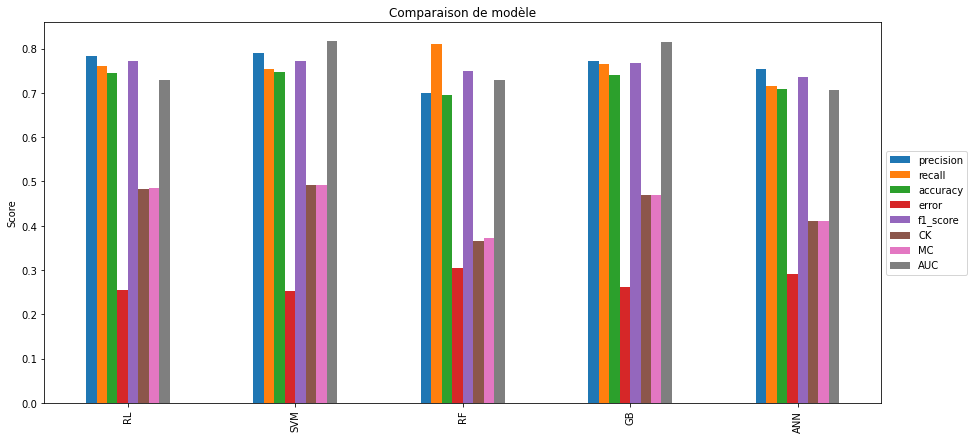

In [117]:
# Données de performance pour chaque modèle
model_data = {
    'RL': {
        'precision': precision,
        'recall': recall,
        'accuracy': Accuracy_Rate,
        'error': Error_rate,
        'f1_score': F1_score_logreg,
        'CK': CK,
        'MC': MC,
        'AUC': auc
    },
    'SVM': {
        'precision': precision2,
        'recall': recall2,
        'accuracy': Accuracy_Rate2,
        'error': Error_rate2,
        'f1_score': F1_score_logreg2,
        'CK': CK2,
        'MC': MC2,
        'AUC': auc2
    },
    'RF': {
        'precision': precision6,
        'recall': recall6,
        'accuracy': Accuracy_Rate6,
        'error': Error_rate6,
        'f1_score': F1_score_logreg6,
        'CK': CK6,
        'MC': MC6,
        'AUC': auc3
    },
    'GB': {
        'precision': precision8,
        'recall': recall8,
        'accuracy': Accuracy_Rate8,
        'error': Error_rate8,
        'f1_score': F1_score_logreg8,
        'CK': CK8,
        'MC': MC8,
        'AUC': auc4
    },
    'ANN': {
        'precision': precision9,
        'recall': recall9,
        'accuracy': Accuracy_Rate9,
        'error': Error_rate9,
        'f1_score': F1_score_ANN9 ,
        'CK': CK9,
        'MC': MC9,
        'AUC': auc5
}
                }

# Créer un DataFrame pour chaque métrique de performance
precision_df = pd.DataFrame.from_dict({k: v['precision'] for k, v in model_data.items()}, orient='index')
recall_df = pd.DataFrame.from_dict({k: v['recall'] for k, v in model_data.items()}, orient='index')
accuracy_df = pd.DataFrame.from_dict({k: v['accuracy'] for k, v in model_data.items()}, orient='index')
error_df = pd.DataFrame.from_dict({k: v['error'] for k, v in model_data.items()}, orient='index')
f1_score_df = pd.DataFrame.from_dict({k: v['f1_score'] for k, v in model_data.items()}, orient='index')
CK_df = pd.DataFrame.from_dict({k: v['CK'] for k, v in model_data.items()}, orient='index')
MC_df = pd.DataFrame.from_dict({k: v['MC'] for k, v in model_data.items()}, orient='index')
AUC_df = pd.DataFrame.from_dict({k: v['AUC'] for k, v in model_data.items()}, orient='index')

# Placer tous les tableaux dans une liste pour les concaténer horizontalement
dfs = [precision_df, recall_df, accuracy_df, error_df, f1_score_df, CK_df, MC_df,AUC_df]

# Concaténer horizontalement les tableaux pour créer un seul DataFrame
results_df = pd.concat(dfs, axis=1)

# Renommer les colonnes pour qu'elles correspondent aux métriques de performance
results_df.columns = ['precision', 'recall', 'accuracy', 'error', 'f1_score', 'CK', 'MC','AUC']

# Afficher le DataFrame
print(results_df)
# Tracer les performances de chaque modèle pour chaque métrique
results_df.plot(kind='bar',figsize=(15, 7))
plt.title('Comparaison de modèle')
plt.ylabel('Score')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# Regression Logistique : RFECV

In [133]:
from sklearn.feature_selection import RFECV

# Créez le modèle de régression logistique
clf = LogisticRegression(max_iter=1000)

# Utilisez RFECV avec le modèle de régression logistique
selector = RFECV(clf, cv=5)
selector.fit(X_train, Y_train)

# Triez les caractéristiques sélectionnées par ordre d'importance
feature_ranks = selector.ranking_
sorted_feature_indices = sorted(range(len(feature_ranks)), key=lambda x: feature_ranks[x])

# Sélectionnez les 13 meilleures caractéristiques
top_13_feature_indices = sorted_feature_indices[:13]

# Imprimer les 13 meilleures caractéristiques
print("Caractéristiques sélectionnées (13 meilleures) :")
for feature_list_index in top_13_feature_indices:
    print(df2.columns[feature_list_index])

Caractéristiques sélectionnées (13 meilleures) :
SEX_M
ENFANT_BIN
13reconfort_entourage
service_COVID19
Anatomopathologie
Biologie médicale
Chirurgie tête et cou
Chirurgie infantile/pédiatrique
Chirurgie Gynéco-Obstétrique
Chirurgie Maxillo-faciale
Chirurgie: Neurochirurgie
Chirurgie: Ophtalmologie
Chirurgie : Orthopédie


## SVM : RFECV

In [139]:
# Créez le modèle SVM
clf = SVC(kernel='linear')

# Utilisez RFECV avec le modèle SVM
selector = RFECV(clf, cv=5)
selector.fit(X_train, Y_train)

# Triez les caractéristiques sélectionnées par ordre d'importance
feature_ranks = selector.ranking_
sorted_feature_indices = sorted(range(len(feature_ranks)), key=lambda x: feature_ranks[x])

# Sélectionnez les 13 meilleures caractéristiques
top_13_feature_indices = sorted_feature_indices[:13]

# Imprimer les 13 meilleures caractéristiques
print("Caractéristiques sélectionnées (13 meilleures) :")
for feature_list_index in top_13_feature_indices:
    print(df.columns[feature_list_index])

Caractéristiques sélectionnées (13 meilleures) :
2. Quel âge avez-vous ?
PUBLIC_VS_PRIVE_ET_EPBNL
ANCIENNETE
13reconfort_entourage
service_COVID19
Anatomopathologie
Biologie médicale
Chirurgie tête et cou
Chirurgie générale
Chirurgie infantile/pédiatrique
Chirurgie Gynéco-Obstétrique
Chirurgie Maxillo-faciale
Chirurgie: Neurochirurgie


## RF : RFECV

In [137]:
# Créez le modèle RandomForest
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Utilisez RFECV avec le modèle RandomForest
selector = RFECV(clf, cv=5)
selector.fit(X_train, Y_train)

# Triez les caractéristiques sélectionnées par ordre d'importance
feature_ranks = selector.ranking_
sorted_feature_indices = sorted(range(len(feature_ranks)), key=lambda x: feature_ranks[x])

# Sélectionnez les 13 meilleures caractéristiques
top_13_feature_indices = sorted_feature_indices[:13]

# Imprimer les 13 meilleures caractéristiques
print("Caractéristiques sélectionnées (13 meilleures) :")
for feature_list_index in top_13_feature_indices:
    print(df.columns[feature_list_index])

Caractéristiques sélectionnées (13 meilleures) :
2. Quel âge avez-vous ?
SEX_M
IMC
PUBLIC_VS_PRIVE_ET_EPBNL
ANCIENNETE
11conjoint_domicile
ENFANT_BIN
14proche_aidant
service_COVID19
Chirurgie tête et cou
Chirurgie Maxillo-faciale
Chirurgie : Orthopédie
Chirurgie plastique


## RF : GB

In [138]:
# Créez le modèle GradientBoosting
clf = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Utilisez RFECV avec le modèle GradientBoosting
selector = RFECV(clf, cv=5)
selector.fit(X_train, Y_train)

# Triez les caractéristiques sélectionnées par ordre d'importance
feature_ranks = selector.ranking_
sorted_feature_indices = sorted(range(len(feature_ranks)), key=lambda x: feature_ranks[x])

# Sélectionnez les 13 meilleures caractéristiques
top_13_feature_indices = sorted_feature_indices[:13]

# Imprimer les 13 meilleures caractéristiques
print("Caractéristiques sélectionnées (13 meilleures) :")
for feature_list_index in top_13_feature_indices:
    print(df.columns[feature_list_index])

Caractéristiques sélectionnées (13 meilleures) :
2. Quel âge avez-vous ?
IMC
PUBLIC_VS_PRIVE_ET_EPBNL
11conjoint_domicile
service_COVID19
Chirurgie tête et cou
Chirurgie plastique
Chirurgie Viscérale et Digestive
Chirurgie Vasculaire
Médecine : Gastroentérologie
Médecine : Pédiatrie (Néonatologie)
Médecine : Pédiatrie (hors néonatologie)
Psychiatrie adulte
